In [15]:
from river.datasets import synth
from river import tree, stream, metrics, drift,forest
from itertools import chain
from itertools import cycle
import itertools
import random
import pickle
import helper_lib
import importlib
from helper_lib import group_close_numbers, transform_drift_detections_into_intervals
from helper_lib import take_tests_for_streams_on_tree, prefix_sum, take_tests_for_streams_on_given_model
from helper_lib import take_tests_for_streams_on_given_model_experimental, visualize_interval_differences, visualize_results
from helper_lib import take_tests_for_streams_on_given_model_detectors_dynamic_pool
from helper_lib import take_tests_for_streams_on_given_model_fast_detectors_dynamic_pool
from helper_lib import calculate_drift_intervals,take_tests_for_streams_on_given_model_experimental_real_data
from complex_generators import generate_cyclical_drift_stream, generate_random_chain_stream
from model_factory import ARFModelFactory,TreeModelFactory


In [ ]:
from river import tree, metrics

model = tree.HoeffdingTreeClassifier()


In [17]:
type(myStream)

generator

In [45]:
classifier_names = [
        "hoeffding_tree",
        "adaptive_rf",
        # "naive_bayes",
        # "logistkic_regression",
        # "knn",
    ]

In [19]:
def ADWIN_detector_factory():
    return drift.ADWIN()

metric = metrics.ClassificationReport()
number_of_detectors = 50

In [44]:
myStream = stream.iter_arff(r'real_data/elecNormNew.arff', target='class')
for i, (x,y) in enumerate(myStream):
    print(x)
    print(y)
    break

{'date': 0.0, 'day': '2', 'period': 0.0, 'nswprice': 0.056443, 'nswdemand': 0.439155, 'vicprice': 0.003467, 'vicdemand': 0.422915, 'transfer': 0.414912}
UP


In [46]:
from model_factory import ModelFactoryProducer
result_per_classifier = {}

for classifier_name in classifier_names:
    print(classifier_name)
    myStream = stream.iter_arff(r'real_data/elecNormNew.arff', target='class')
    detected_change_points, accuracys_windowed,raw_accuracy = take_tests_for_streams_on_given_model_experimental_real_data(
            myStream,
            metric,
            detector_factories = {
                "ADWIN": ADWIN_detector_factory,
            },
            model_factory=ModelFactoryProducer.get_factory(classifier_name),
            number_of_detectors=number_of_detectors,
            detector_offset=80
        )
    result_per_classifier[classifier_name] = (detected_change_points, accuracys_windowed,raw_accuracy)

with open('experiment_real_data_non_elec.pkl', 'wb') as file:
    pickle.dump(result_per_classifier, file)

hoeffding_tree
45312
adaptive_rf
45312


In [ ]:
with open('experiment_real_data_non_elec.pkl', 'wb') as file:
    pickle.dump(result_per_classifier, file)

In [ ]:
# Deserialize the object from the file
with open('experiment_real_data_non_elec.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

hoeffding_tree


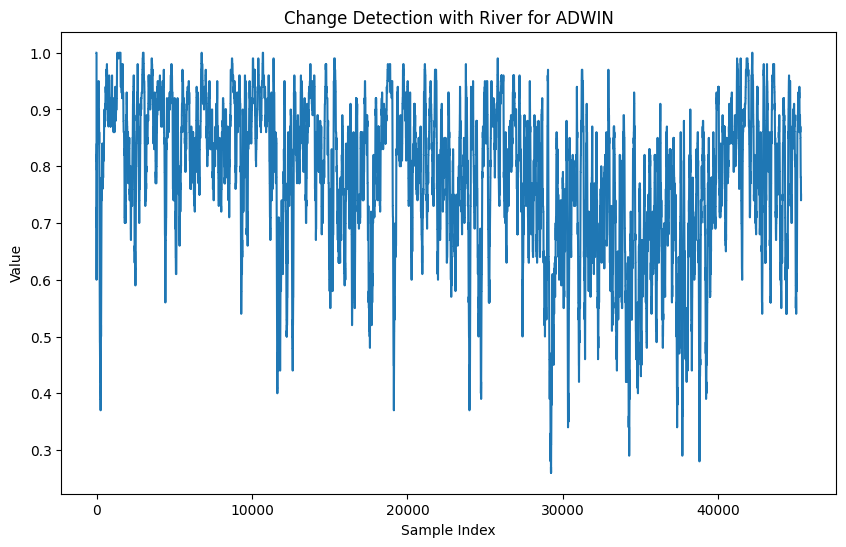

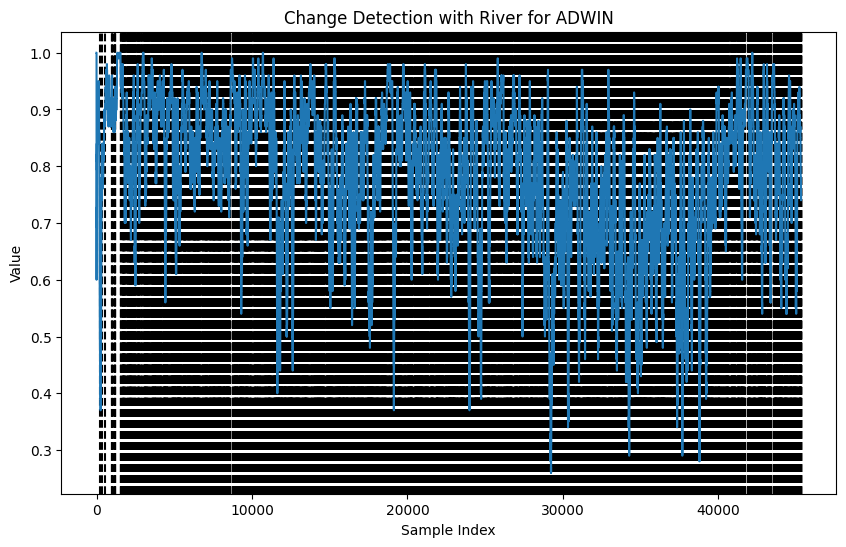

adaptive_rf


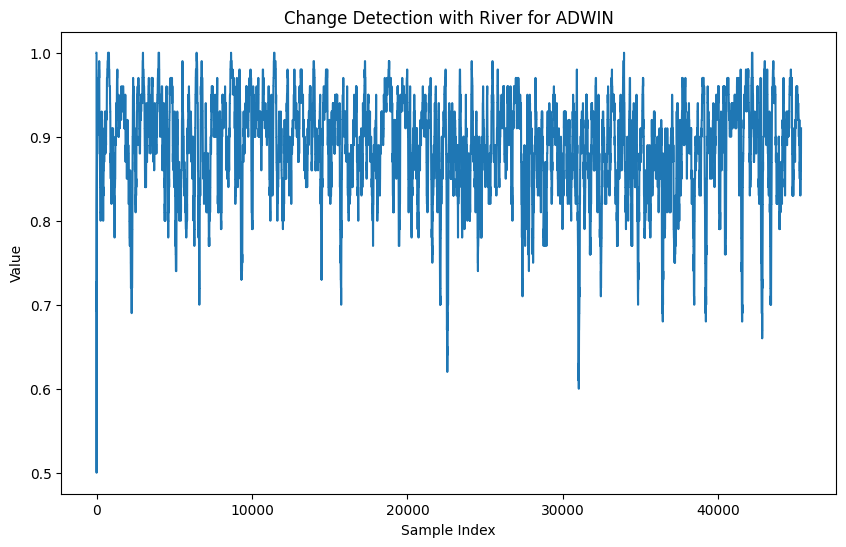

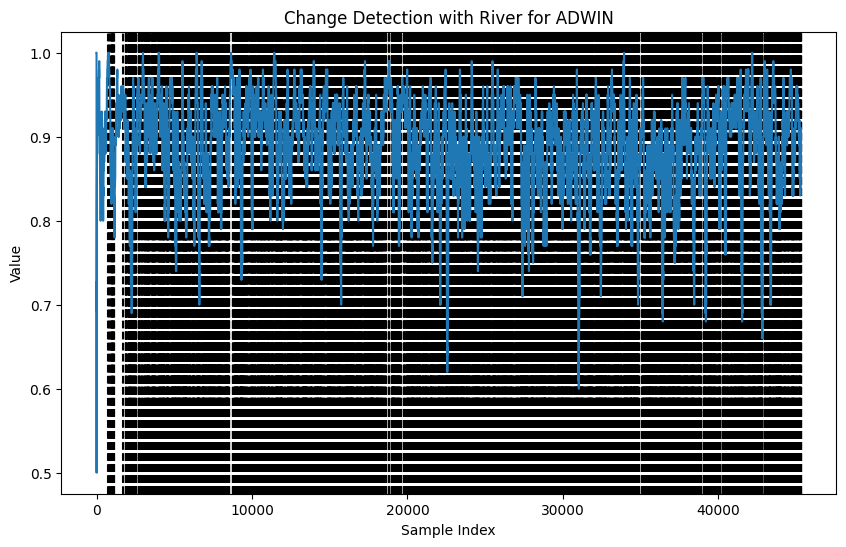

In [49]:
import helper_lib
import importlib
importlib.reload(helper_lib)

for name in result_per_classifier:
    print(name)
    (detected_change_points, accuracys_windowed,accuracy_raw) = result_per_classifier[name]
    helper_lib.visualize_real_stream({"ADWIN":[]},accuracys_windowed)
    helper_lib.visualize_real_stream(detected_change_points, accuracys_windowed)

hoeffding_tree


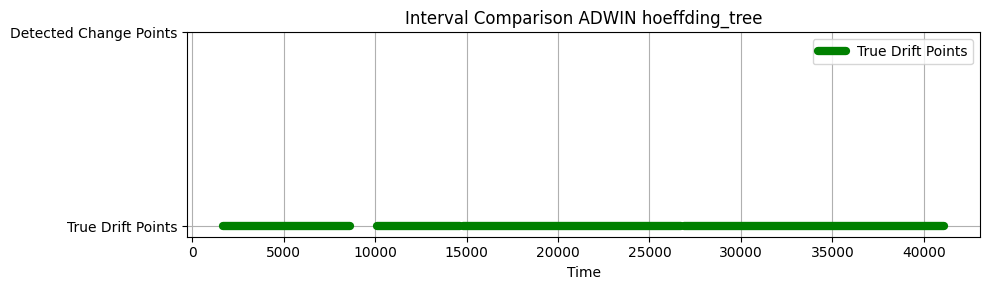

adaptive_rf


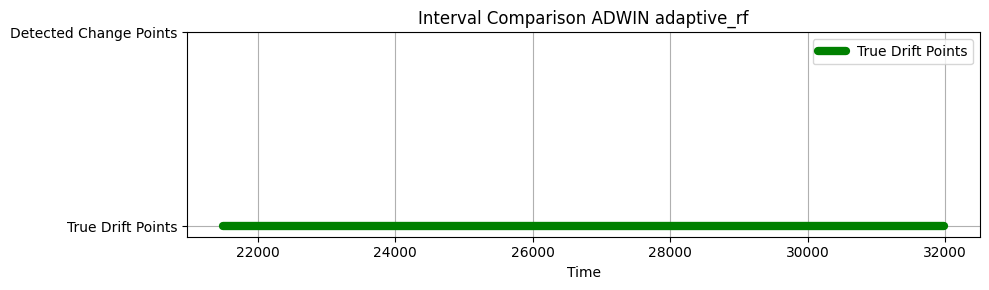

In [48]:
importlib.reload(helper_lib)

for classifier_name in result_per_classifier:
    print(classifier_name)
    (detected_change_points, accuracys_windowed,accuracy_raw) = result_per_classifier[classifier_name]
    for name,detected_point in detected_change_points.items():
        intervals_b = transform_drift_detections_into_intervals(detected_change_points[name],120,600)
        helper_lib.visualize_interval_differences([], intervals_b, labels=('Detected Change Points', 'True Drift Points'),name=name+ " " +classifier_name)